# Assignment 3
# Unsupervised Learning - Clustering

**Data:**

The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories.

**Objective:**

Clustering customers into groups using ML for subsequent targeted marketing.

Use **KMeans algorithm** and **Agglomerative clustering**. Identify the best number of clusters.


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [2]:
df = pd.read_csv('Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

### Scaling

In [5]:
# Hence the channel, region features are encoded. We can scale all other features

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x = df
x[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']] = sc.fit_transform(x[['Fresh', 'Milk', 'Grocery', 
                                                                'Frozen','Detergents_Paper', 'Delicassen']])

In [6]:
x.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,2,3,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,2,3,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,1,3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,2,3,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


### K-Means Clustering

In [7]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=9)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

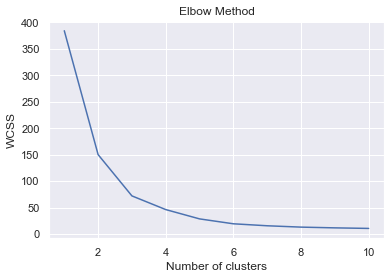

In [8]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
# finding silhouette score

from sklearn.metrics import silhouette_score
s_coef = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=9)
    kmeans.fit(x)
    score = silhouette_score(x,kmeans.labels_)
    s_coef.append(score)

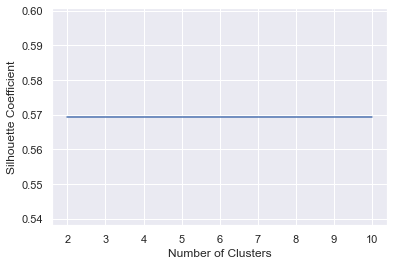

In [10]:
sns.set()
plt.plot(range(2, 11), s_coef)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 3,init='k-means++',random_state=9)
y = kmeans.fit_predict(x)

In [12]:
from sklearn.metrics import silhouette_score
silhouette_score(x,kmeans.labels_)

0.6840094052135669

### Agglomerative Clustering

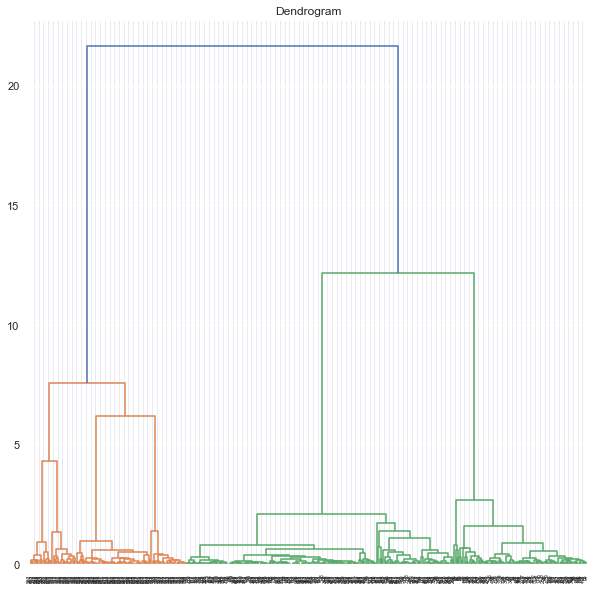

In [13]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,10))
plt.title('Dendrogram')
Dendrogram = shc.dendrogram(shc.linkage(x, method='ward'))

In [14]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3)
y = ac.fit_predict(x)

In [15]:
silhouette_score(x,ac.labels_)

0.6828962385898321

In [16]:
y

array([1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,

**Findings:**

* In Kmeans Clustering and Agglomerative Clustering, we got best number of clusters as **3**.

In [22]:
df = pd.read_csv('Wholesale customers data.csv')

In [23]:
y = pd.DataFrame(y)
df = pd.concat([df,y],axis=1)
df.rename(columns = {0 : 'Groups'}, inplace = True)

In [24]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Groups
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,1


In [25]:
df['Groups'].nunique()

3

##### Jibin K Joy, ML & AI, KKEM August 2022 Batch